In [1]:
import pandas as pd
import os,sys, imp, glob
sys.path.append('./src/')
import doc_utils_clean as doc_utils
import feature_utils, common_utils
import defines
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dir_name="recalc_tfidf"

# Check most common lemmas

In [12]:
sent_lemma_db =  common_utils.concat_dbs(dir_name,"sent_pos_db",['LEMMA'])

In [13]:
sent_lemma_db

doc_idx  sent_idx LEMMA
0             1         0    אז
1             1         1  היום
2             1         2   הוא
3             1         3  נפגש
4             1         4    פה
...         ...       ...   ...
548199       80      5321   היה
548200       80      5322     ל
548201       80      5323   אני
548202       80      5324  מאוד
548203       80      5325   קשה

[548204 rows x 3 columns]

In [14]:
sent_label_db =  common_utils.concat_dbs(dir_name,"sent_db",['is_nar'])

In [15]:
sent_label_db

doc_idx  sent_idx   is_nar
0            1         0 0.000000
1            1         1 0.000000
2            1         2 0.000000
3            1         3 0.000000
4            1         4 0.000000
...        ...       ...      ...
36319       80       486 0.000000
36320       80       487 0.000000
36321       80       488 0.000000
36322       80       489 0.000000
36323       80       490 0.000000

[36324 rows x 3 columns]

In [16]:
sent_lemma_db =  pd.merge(sent_label_db,sent_lemma_db, left_on=['doc_idx','sent_idx'],right_on=['doc_idx','sent_idx'],validate="one_to_one")

In [17]:
sent_lemma_db

doc_idx  sent_idx   is_nar    LEMMA
0            1         0 0.000000       אז
1            1         1 0.000000     היום
2            1         2 0.000000      הוא
3            1         3 0.000000     נפגש
4            1         4 0.000000       פה
...        ...       ...      ...      ...
36319       80       486 0.000000        ה
36320       80       487 0.000000  התנהגות
36321       80       488 0.000000        ש
36322       80       489 0.000000   בעקבות
36323       80       490 0.000000       זה

[36324 rows x 4 columns]

In [73]:
from collections import Counter
lemma_Counter = Counter(sent_lemma_db['LEMMA'].tolist())
most_occur = lemma_Counter.most_common()[:200]
print(most_occur)

[('ה', 2740), ('הוא', 1971), ('זה', 1642), ('ש', 1391), ('ל', 1271), ('ב', 1223), ('ו', 976), ('לא', 939), ('את', 794), ('אני', 683), ('היה', 594), ('כאילו', 550), ('אז', 472), ('אה', 460), ('כן', 438), ('מה', 405), ('כ', 392), ('מ', 357), ('של', 345), ('כול', 308), ('אבל', 281), ('XXX', 280), ('יש', 274), ('אמר', 270), ('גם', 262), ('על', 250), ('אתה', 232), ('איזה', 186), ('משהו', 182), ('ידע', 179), ('עשה', 176), ('_', 168), ('אם', 162), ('עם', 152), ('או', 150), ('יום', 142), ('דבר', 137), ('יכול', 128), ('חשב', 126), ('כי', 125), ('טוב', 122), ('קצת', 121), ('היא', 115), ('כבר', 114), ('שם', 113), ('יותר', 112), ('מאוד', 109), ('שבוע', 107), ('עכשיו', 106), ('סדר', 104), ('צריך', 102), ('זאת', 101), ('פעם', 101), ('אמ', 100), ('ממש', 99), ('רצה', 98), ('עוד', 98), ('זמן', 97), ('בא', 92), ('הרגיש', 92), ('הרבה', 88), ('ככה', 87), ('איש', 84), ('דיבר', 79), ('אחד', 78), ('איך', 76), ('אין', 69), ('אולי', 69), ('עבר', 68), ('שני', 68), ('הגיד', 65), ('ראה', 65), ('באמת', 64), ('הגיע

In [157]:
len(most_occur)

27804

In [33]:
most_common_lemma = [item[0] for item in most_occur]
most_common_lemma

['ה',
 'הוא',
 'זה',
 'ש',
 'ל',
 'ב',
 'ו',
 'לא',
 'את',
 'אני',
 'היה',
 'כאילו',
 'אז',
 'אה',
 'כן',
 'מה',
 'כ',
 'מ',
 'של',
 'כול',
 'אבל',
 'XXX',
 'יש',
 'אמר',
 'גם',
 'על',
 'אתה',
 'איזה',
 'משהו',
 'ידע',
 'עשה',
 '_',
 'אם',
 'עם',
 'או',
 'יום',
 'דבר',
 'יכול',
 'חשב',
 'כי',
 'טוב',
 'קצת',
 'היא',
 'כבר',
 'שם',
 'יותר',
 'מאוד',
 'שבוע',
 'עכשיו',
 'סדר',
 'צריך',
 'זאת',
 'פעם',
 'אמ',
 'ממש',
 'רצה',
 'עוד',
 'זמן',
 'בא',
 'הרגיש',
 'הרבה',
 'ככה',
 'איש',
 'דיבר',
 'אחד',
 'איך',
 'אין',
 'אולי',
 'עבר',
 'שני',
 'הגיד',
 'ראה',
 'באמת',
 'הגיע',
 'יצא',
 'קשה',
 'עבודה',
 'אלה',
 'נראה',
 'פה',
 'לקח',
 'רק',
 'כך',
 'הלך',
 'עבד',
 'כמה',
 'נורא',
 'זהו',
 'שנה',
 'כש',
 'ממ',
 'קודם',
 'אחר',
 'אמת',
 'שעה',
 'אצל',
 'אל',
 'עצמו',
 'עד',
 'סוף',
 'לפני',
 'ומך?',
 'קרה',
 'צד',
 'נכון',
 'זכר',
 'איל',
 'התחיל',
 'מקום',
 'עניין',
 'הבין',
 'כמו',
 'אחרי',
 'סתם',
 'הביא',
 'בסדר',
 'היום',
 'בגלל',
 'אנחנו',
 'היות',
 'פשוט',
 'אפשר',
 'בוקר',
 'חישב',
 'חב

In [52]:
from wordcloud import WordCloud
font_path="./external_src/OpenSans-VariableFont_wdth,wght.ttf"
text = ' '.join(sent_lemma_db['LEMMA'])
word_cloud = WordCloud(
    font_path=font_path,
    collocations = False,
    background_color = 'white',
    max_words=200,
    stopwords=most_common_lemma,
    max_font_size=100)

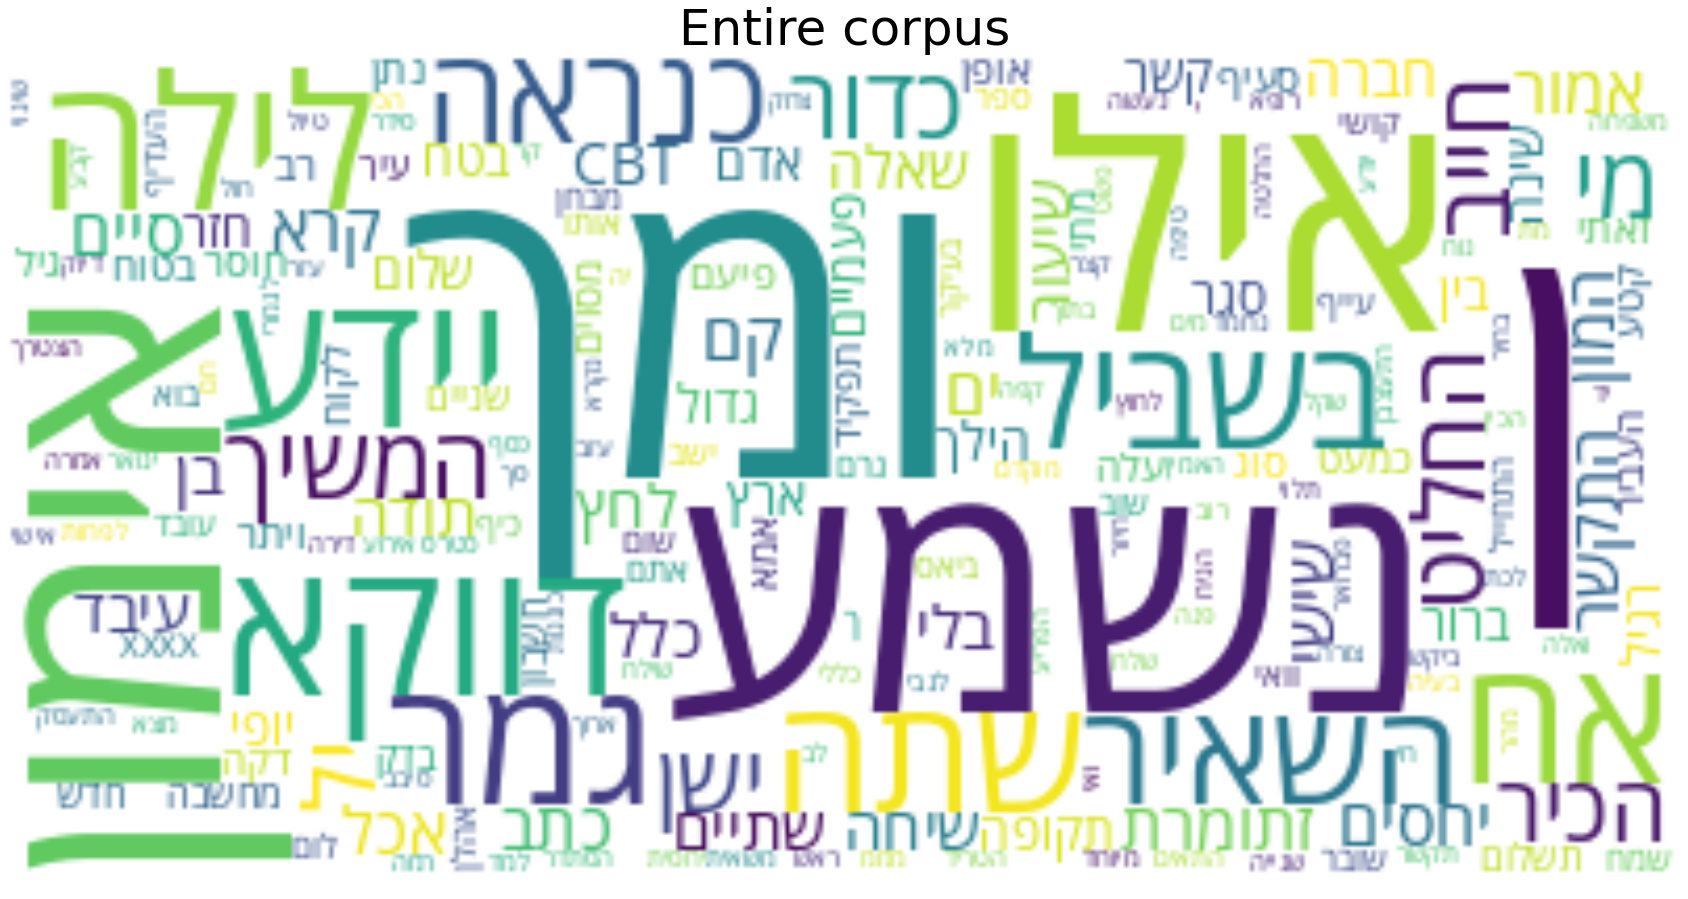

In [54]:
plt.figure(figsize = (30,30))
word_cloud.generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Entire corpus",fontsize=50)
plt.show()

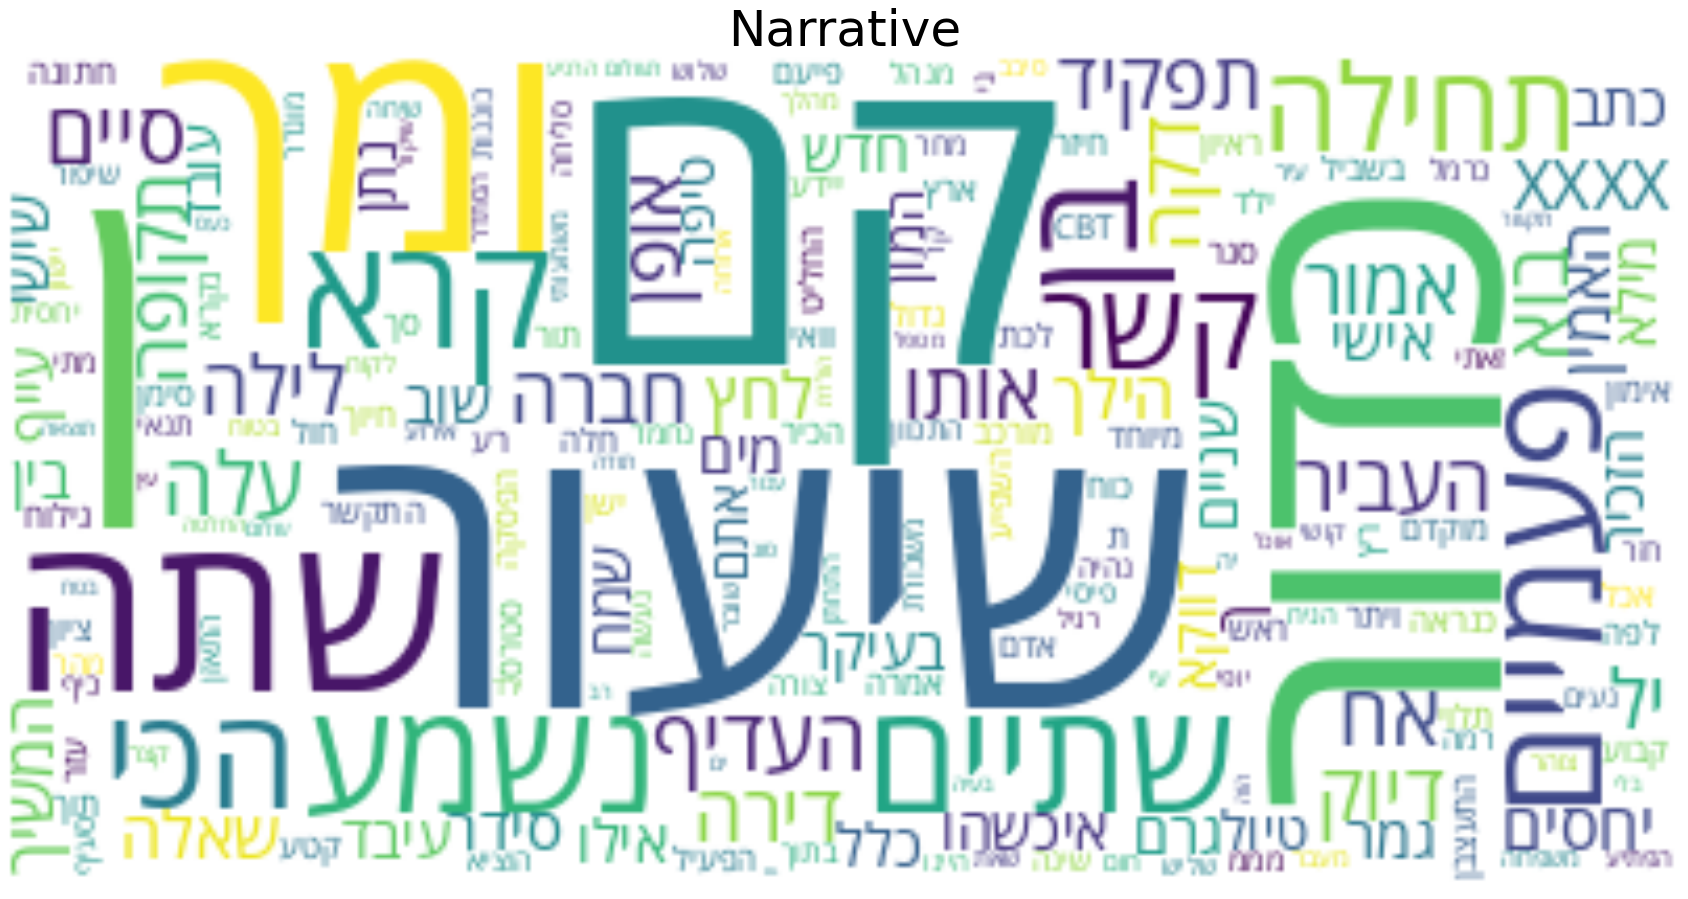

In [56]:
plt.figure(figsize = (30,30))
text_nar = ' '.join(sent_lemma_db.query("is_nar == 1")['LEMMA'])
word_cloud.generate(text_nar)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Narrative",fontsize=50)
plt.show()

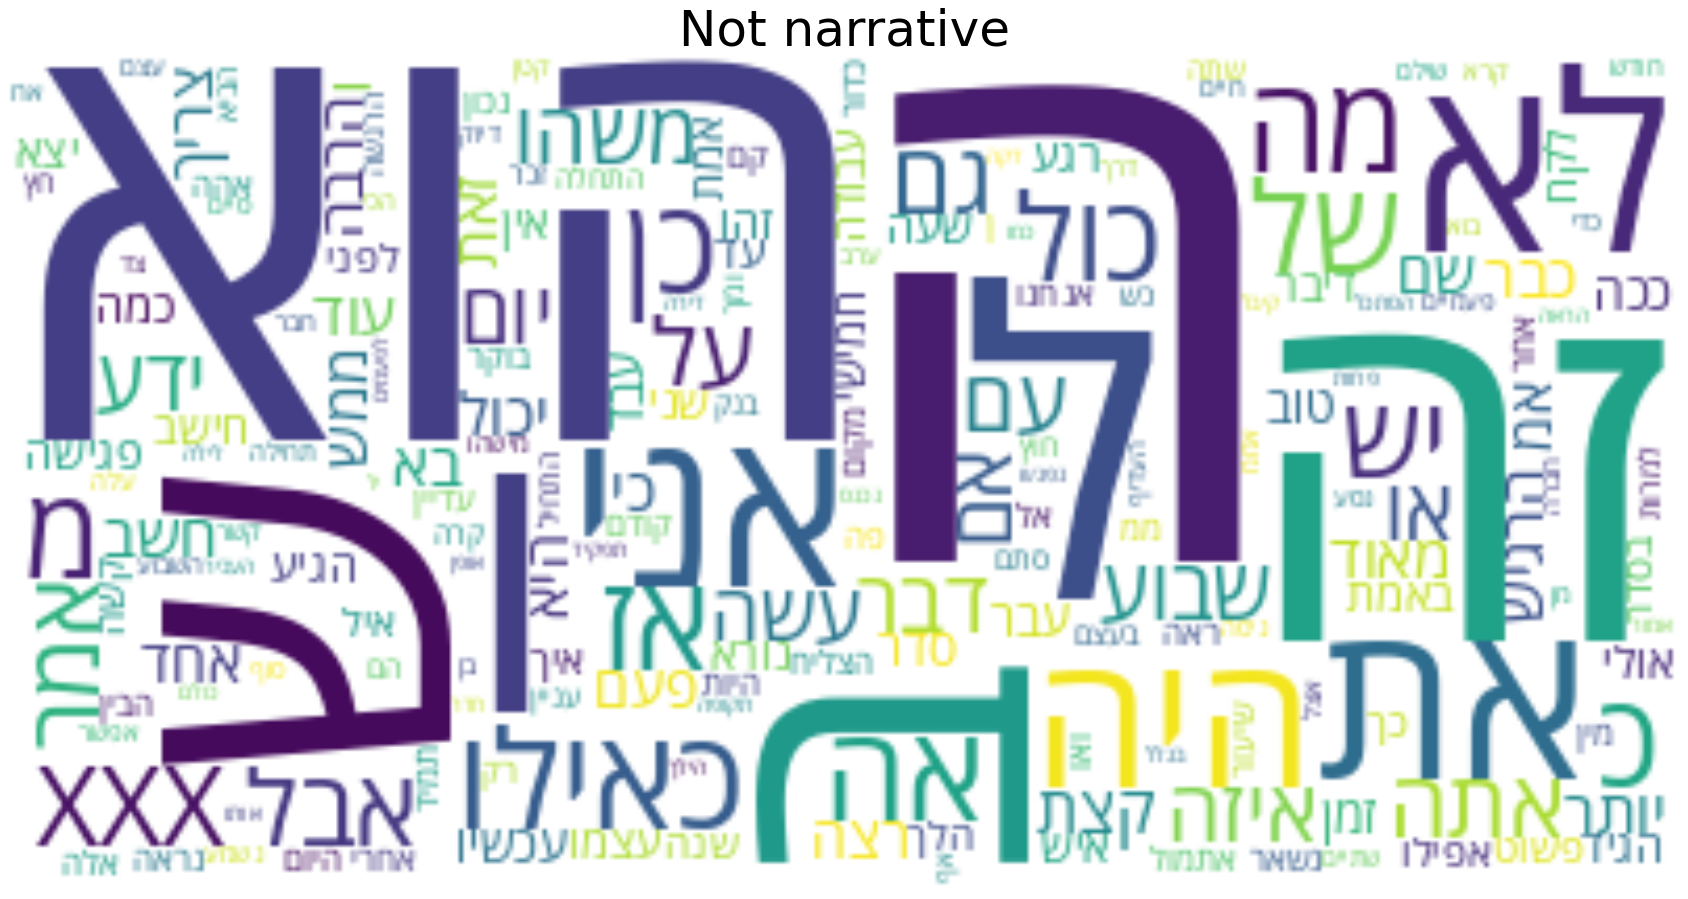

In [58]:
plt.figure(figsize = (30,30))
text_not_nar = ' '.join(sent_lemma_db.query("is_nar == 0")['LEMMA'])
word_cloud = WordCloud(font_path=font_path,collocations = False, background_color = 'white',max_words=200).generate(text_nar)
plt.imshow(word_cloud , interpolation='bilinear')
plt.title("Not narrative",fontsize=50)
plt.axis("off")
plt.show()

# Check most common lemmas

In [199]:
lemma_count_db= pd.DataFrame(sent_lemma_db['LEMMA'].value_counts())
lemma_count_db.reset_index(inplace=True)
lemma_count_db

index  LEMMA
0          ה   2740
1        הוא   1971
2         זה   1642
3          ש   1391
4          ל   1271
...      ...    ...
2719  אימון?      1
2720   מהכבר      1
2721   איתי?      1
2722   תרגול      1
2723    וילה      1

[2724 rows x 2 columns]

<AxesSubplot:>

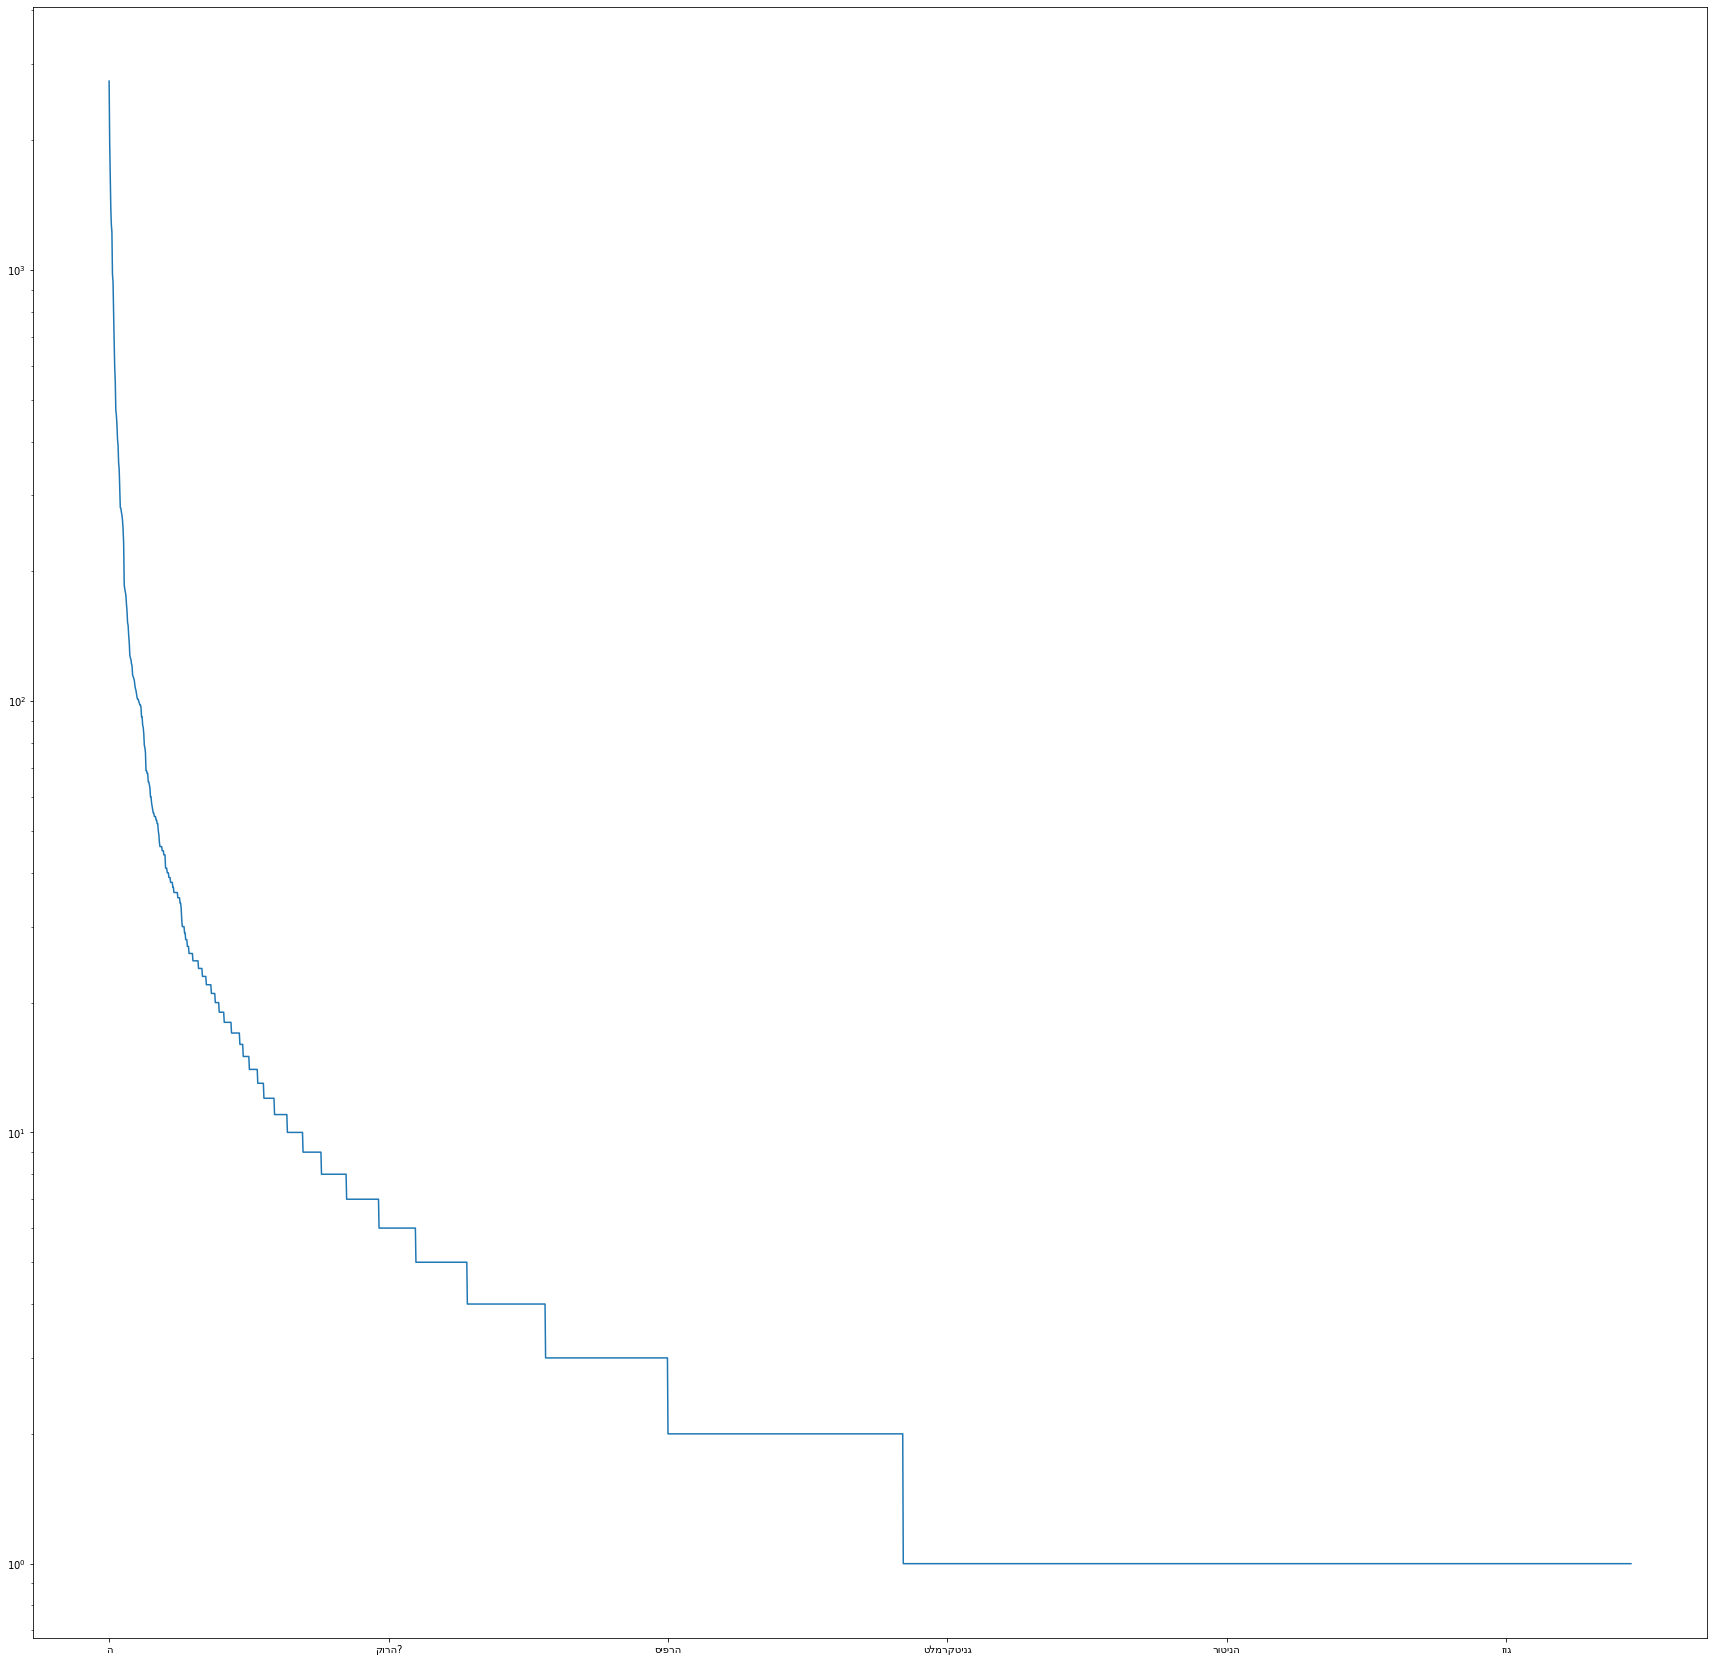

In [202]:
plt.figure(figsize = (30,30))
sent_lemma_db['LEMMA'].value_counts().plot(logy=True)

In [205]:
lemma_count_db.describe()

LEMMA
count 2724.000000
mean    13.334802
std     95.487297
min      1.000000
25%      1.000000
50%      2.000000
75%      4.000000
max   2740.000000

In [209]:
lemma_count_db.iloc[:45,:]

index  LEMMA
0       ה   2740
1     הוא   1971
2      זה   1642
3       ש   1391
4       ל   1271
5       ב   1223
6       ו    976
7      לא    939
8      את    794
9     אני    683
10    היה    594
11  כאילו    550
12     אז    472
13     אה    460
14     כן    438
15     מה    405
16      כ    392
17      מ    357
18     של    345
19    כול    308
20    אבל    281
21    XXX    280
22     יש    274
23    אמר    270
24     גם    262
25     על    250
26    אתה    232
27   איזה    186
28   משהו    182
29    ידע    179
30    עשה    176
31      _    168
32     אם    162
33     עם    152
34     או    150
35    יום    142
36    דבר    137
37   יכול    128
38    חשב    126
39     כי    125
40    טוב    122
41    קצת    121
42    היא    115
43    כבר    114
44     שם    113

In [212]:
all_freq_lemma = lemma_count_db['index'].tolist()
all_freq_lemma

['ה',
 'הוא',
 'זה',
 'ש',
 'ל',
 'ב',
 'ו',
 'לא',
 'את',
 'אני',
 'היה',
 'כאילו',
 'אז',
 'אה',
 'כן',
 'מה',
 'כ',
 'מ',
 'של',
 'כול',
 'אבל',
 'XXX',
 'יש',
 'אמר',
 'גם',
 'על',
 'אתה',
 'איזה',
 'משהו',
 'ידע',
 'עשה',
 '_',
 'אם',
 'עם',
 'או',
 'יום',
 'דבר',
 'יכול',
 'חשב',
 'כי',
 'טוב',
 'קצת',
 'היא',
 'כבר',
 'שם',
 'יותר',
 'מאוד',
 'שבוע',
 'עכשיו',
 'סדר',
 'צריך',
 'זאת',
 'פעם',
 'אמ',
 'ממש',
 'רצה',
 'עוד',
 'זמן',
 'בא',
 'הרגיש',
 'הרבה',
 'ככה',
 'איש',
 'דיבר',
 'אחד',
 'איך',
 'אין',
 'אולי',
 'עבר',
 'שני',
 'ראה',
 'הגיד',
 'באמת',
 'הגיע',
 'יצא',
 'קשה',
 'עבודה',
 'אלה',
 'נראה',
 'פה',
 'לקח',
 'רק',
 'כך',
 'הלך',
 'עבד',
 'כמה',
 'נורא',
 'זהו',
 'שנה',
 'כש',
 'ממ',
 'קודם',
 'אחר',
 'שעה',
 'אמת',
 'עצמו',
 'אצל',
 'אל',
 'עד',
 'סוף',
 'לפני',
 'קרה',
 'ומך?',
 'צד',
 'נכון',
 'זכר',
 'איל',
 'התחיל',
 'מקום',
 'עניין',
 'סתם',
 'אחרי',
 'הבין',
 'כמו',
 'בסדר',
 'הביא',
 'היות',
 'בגלל',
 'פשוט',
 'היום',
 'אפשר',
 'בוקר',
 'אנחנו',
 'ניסה',
 'חי

## Save stop_lemmas

In [213]:
import json
dir_name = "tf_stop_w"
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"my_stop_lemmas.json")
with open(json_path, 'w') as fp:
    json.dump(all_freq_lemma,fp)

# Check most common WORDS

In [104]:
sent_word_db =  common_utils.concat_dbs(dir_name,"sent_db",['text','is_nar'])

In [105]:
def get_words_from_db(db):
    return flatten(db['text'].str.split().tolist())

In [126]:
word_counter = Counter(get_words_from_db(sent_word_db))
most_occur = word_counter.most_common()

In [168]:
word_db=pd.DataFrame(get_words_from_db(sent_word_db),columns=['text'])
word_db

text
0           אז
1         היום
2        אנחנו
3       נפגשים
4           פה
...        ...
418649  לעצמך?
418650     היה
418651      לי
418652    מאוד
418653     קשה

[418654 rows x 1 columns]

In [183]:
word_db=pd.DataFrame(get_words_from_db(sent_word_db),columns=['text'])

In [184]:
word_count_db= pd.DataFrame(word_db.value_counts())
word_count_db.reset_index(inplace=True)

In [185]:
word_count_db

text      0
0           זה  15871
1           לא  14888
2          אני  12364
3           את   9195
4        כאילו   8183
...        ...    ...
27799   הקירות      1
27800   מהאישה      1
27801   מהאישי      1
27802  הקיראתה      1
27803     שלא      1

[27804 rows x 2 columns]

In [186]:
freq_persent=0.01
stop_idx=int(len(word_count_db.index)*freq_persent)
print("stop_idx",stop_idx)
word_count_db.iloc[:278,:]

stop_idx 278


text      0
0        זה  15871
1        לא  14888
2       אני  12364
3        את   9195
4     כאילו   8183
..      ...    ...
273    אוהב    170
274     שום    170
275    כולם    169
276  העניין    168
277   כשאני    168

[278 rows x 2 columns]

In [187]:
all_freq_words = word_count_db['text'].tolist()

In [188]:
all_freq_words

['זה',
 'לא',
 'אני',
 'את',
 'כאילו',
 'לי',
 'אה',
 'מה',
 'אז',
 'כן',
 'אבל',
 'גם',
 'של',
 'על',
 'אתה',
 'הוא',
 'שאני',
 'XXX',
 'יש',
 'כל',
 'משהו',
 'או',
 'היה',
 'עם',
 'אם',
 'כי',
 'לך',
 'מאוד',
 'שזה',
 'היא',
 'יותר',
 'כזה',
 'להיות',
 'ש',
 'שלי',
 'ו',
 'יכול',
 'הזה',
 'יודע',
 'אומרת',
 'רוצה',
 'שהוא',
 'וזה',
 'באמת',
 'ה',
 'אולי',
 'יודעת',
 'חושב',
 'הייתי',
 'הרבה',
 'עכשיו',
 'איזה',
 'זאת',
 'שאתה',
 'ככה',
 'טוב',
 'ואני',
 'קצת',
 'שם',
 'עוד',
 'כבר',
 'אומר',
 'לו',
 'אותי',
 'אין',
 'פעם',
 'ואז',
 'דברים',
 'ממש',
 'איך',
 'אחד',
 'לעשות',
 'צריך',
 'מרגיש',
 'אותו',
 'בסדר',
 'אמרתי',
 'כך',
 'שהיא',
 'אנשים',
 'חושבת',
 'נגיד',
 'כמו',
 'קשה',
 'עושה',
 'למה',
 'כמה',
 'שלך',
 'הם',
 'שאת',
 'פה',
 'שיש',
 'בעצם',
 'אנחנו',
 'הזמן',
 'לה',
 'שלא',
 'אמ',
 'נכון',
 'רק',
 'ולא',
 'היום',
 'אותך',
 'הייתה',
 'ב',
 'וגם',
 'דבר',
 'להגיד',
 'פשוט',
 'האלה',
 'הזאת',
 'נורא',
 'נראה',
 'רואה',
 'אדם',
 'לזה',
 'שני',
 'אחר',
 'בא',
 'בזה',
 'תמיד',
 '

## Save stop_words

In [189]:
dir_name = "tf_stop_w"

In [192]:
import json
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"my_stop_words.json")
with open(json_path, 'w') as fp:
    json.dump(all_freq_words,fp)

In [142]:
print(most_occur[290:310])

[('כשאתה', 161), ('לבוא', 161), ('משנה', 161), ('לתת', 158), ('עליי', 156), ('שאולי', 156), ('חברה', 156), ('דרך', 155), ('לבד', 155), ('ביחד', 154), ('החיים', 154), ('שיהיה', 153), ('בטוח', 152), ('יחסית', 151), ('יחסים', 151), ('באותו', 151), ('וזהו', 150), ('שישי', 150), ('קל', 149), ('חברים', 149)]


[Text(0, 0, 'הז'),
 Text(0, 1, 'אל'),
 Text(0, 2, 'ינא'),
 Text(0, 3, 'תא'),
 Text(0, 4, 'וליאכ'),
 Text(0, 5, 'יל'),
 Text(0, 6, 'הא'),
 Text(0, 7, 'המ'),
 Text(0, 8, 'זא'),
 Text(0, 9, 'ןכ'),
 Text(0, 10, 'לבא'),
 Text(0, 11, 'םג'),
 Text(0, 12, 'לש'),
 Text(0, 13, 'לע'),
 Text(0, 14, 'התא'),
 Text(0, 15, 'אוה'),
 Text(0, 16, 'ינאש'),
 Text(0, 17, 'XXX'),
 Text(0, 18, 'שי'),
 Text(0, 19, 'לכ'),
 Text(0, 20, 'והשמ'),
 Text(0, 21, 'וא'),
 Text(0, 22, 'היה'),
 Text(0, 23, 'םע'),
 Text(0, 24, 'םא'),
 Text(0, 25, 'יכ'),
 Text(0, 26, 'ךל'),
 Text(0, 27, 'דואמ'),
 Text(0, 28, 'הזש'),
 Text(0, 29, 'איה'),
 Text(0, 30, 'רתוי'),
 Text(0, 31, 'הזכ'),
 Text(0, 32, 'תויהל'),
 Text(0, 33, 'ש'),
 Text(0, 34, 'ילש'),
 Text(0, 35, 'ו'),
 Text(0, 36, 'לוכי'),
 Text(0, 37, 'הזה'),
 Text(0, 38, 'עדוי'),
 Text(0, 39, 'תרמוא'),
 Text(0, 40, 'הצור'),
 Text(0, 41, 'אוהש'),
 Text(0, 42, 'הזו'),
 Text(0, 43, 'תמאב'),
 Text(0, 44, 'ה'),
 Text(0, 45, 'ילוא'),
 Text(0, 46, 'תעדוי'),
 Text(0, 47, 'בשוח'),
 Text(0

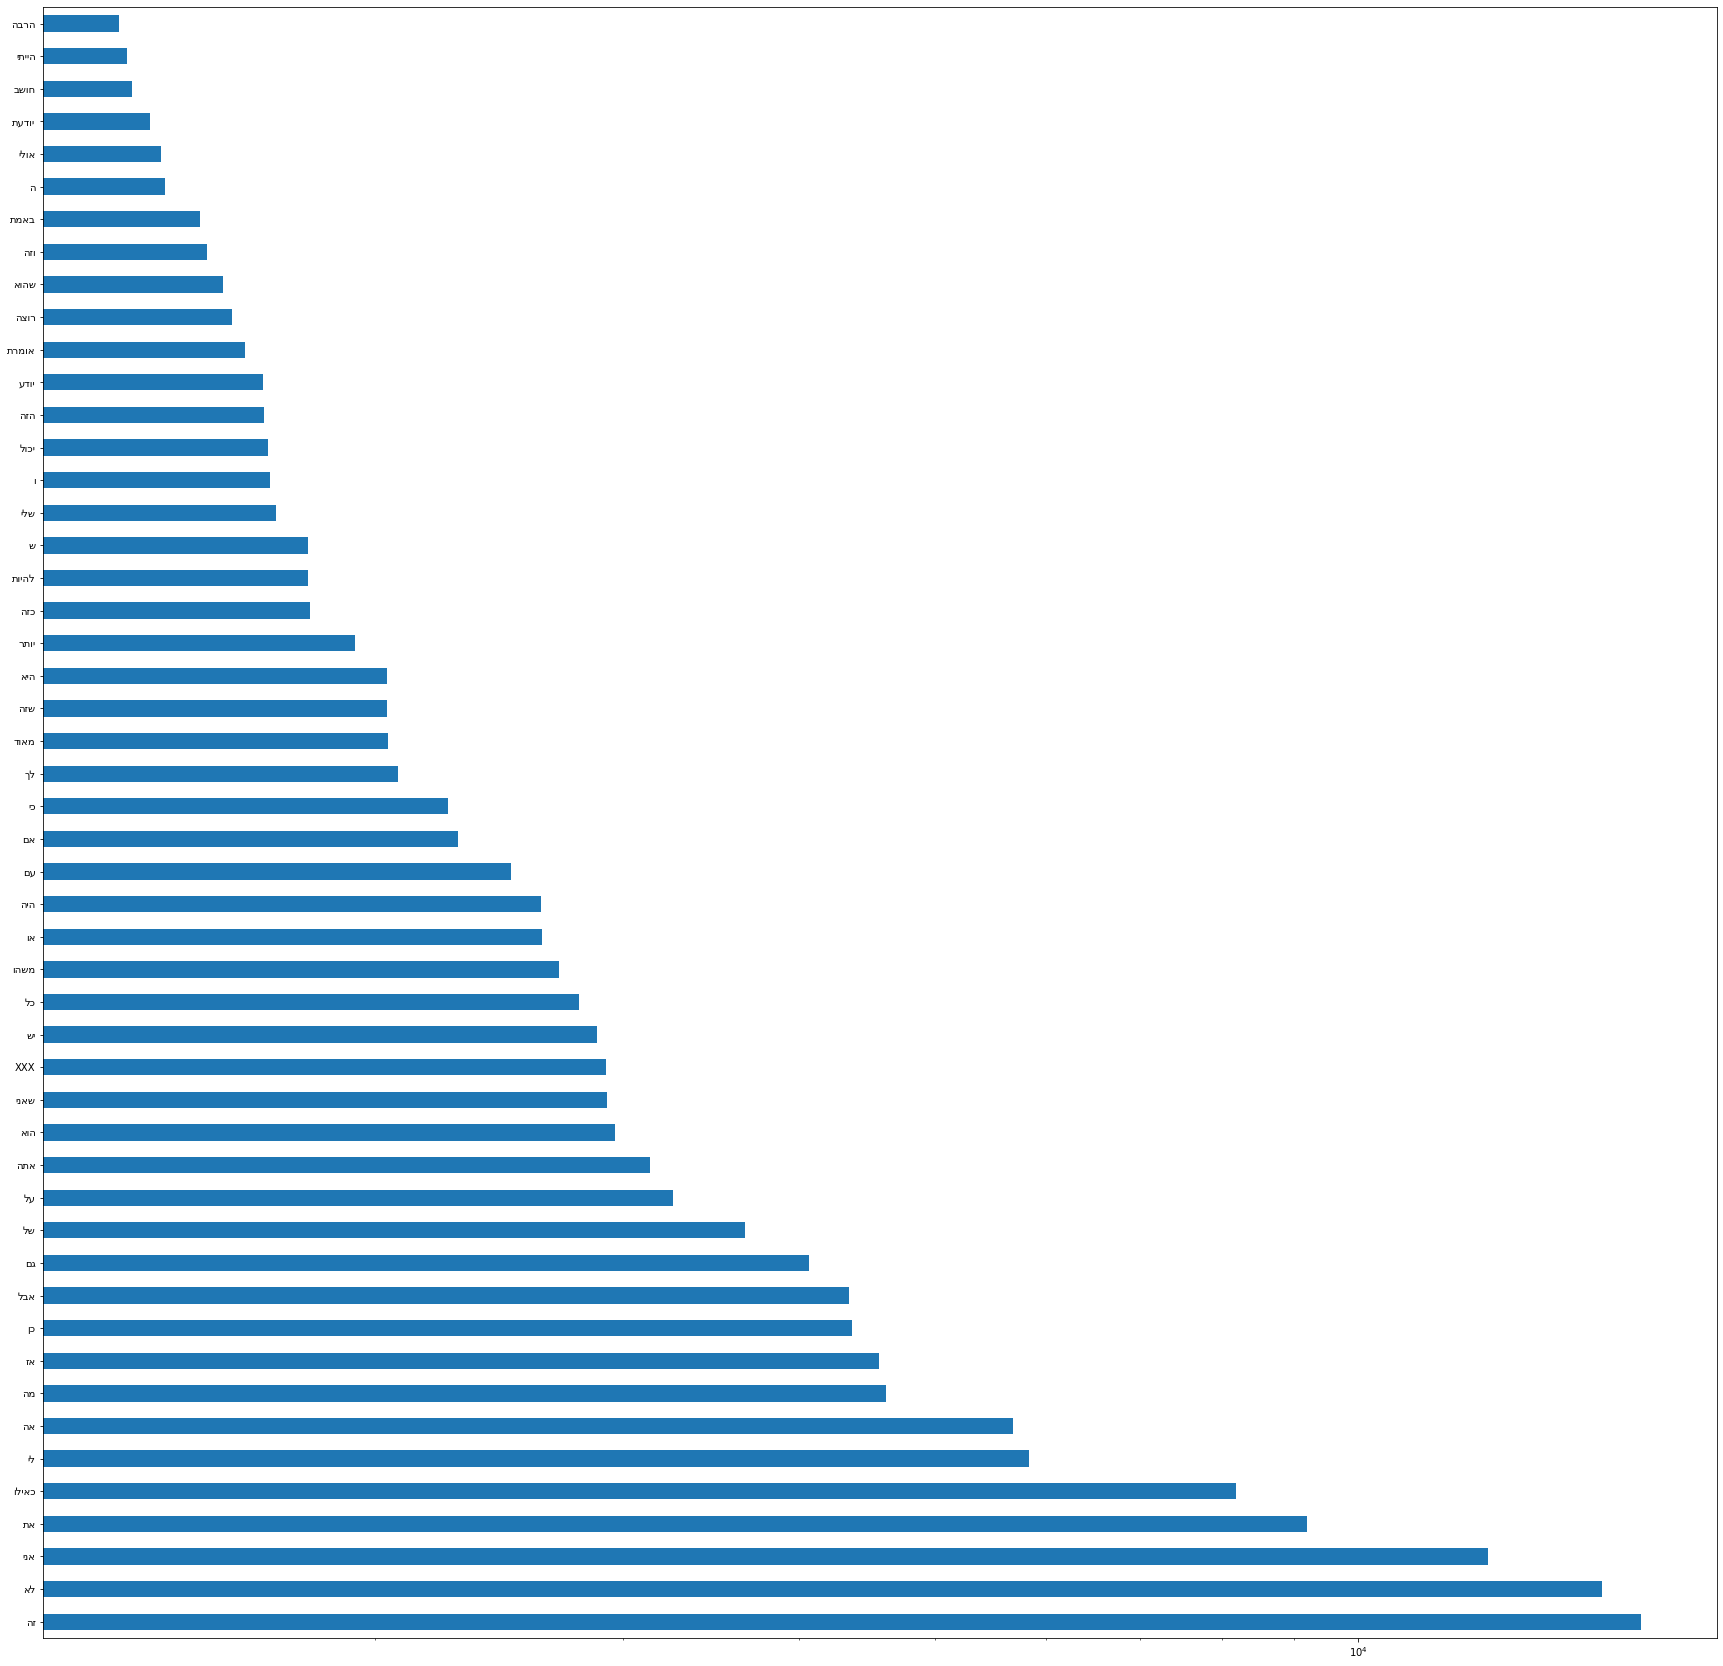

In [141]:
from bidi import algorithm as bidialg      # needed for arabic, hebrew
plt.figure(figsize = (30,30))
word_db=pd.DataFrame(get_words_from_db(sent_word_db),columns=['text'])
heb_feature_names =[bidialg.get_display(feature) for feature in word_db['text'].value_counts().index.tolist()[:50]]

ax=word_db['text'].value_counts()[:50].plot(kind='barh',logx=True,yticks=np.arange(0,51))
ax.set_yticklabels(heb_feature_names)



In [148]:
word_db['text'].value_counts().describe()

count   27804.000000
mean       15.057330
std       206.305578
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max     15871.000000
Name: text, dtype: float64

<AxesSubplot:>

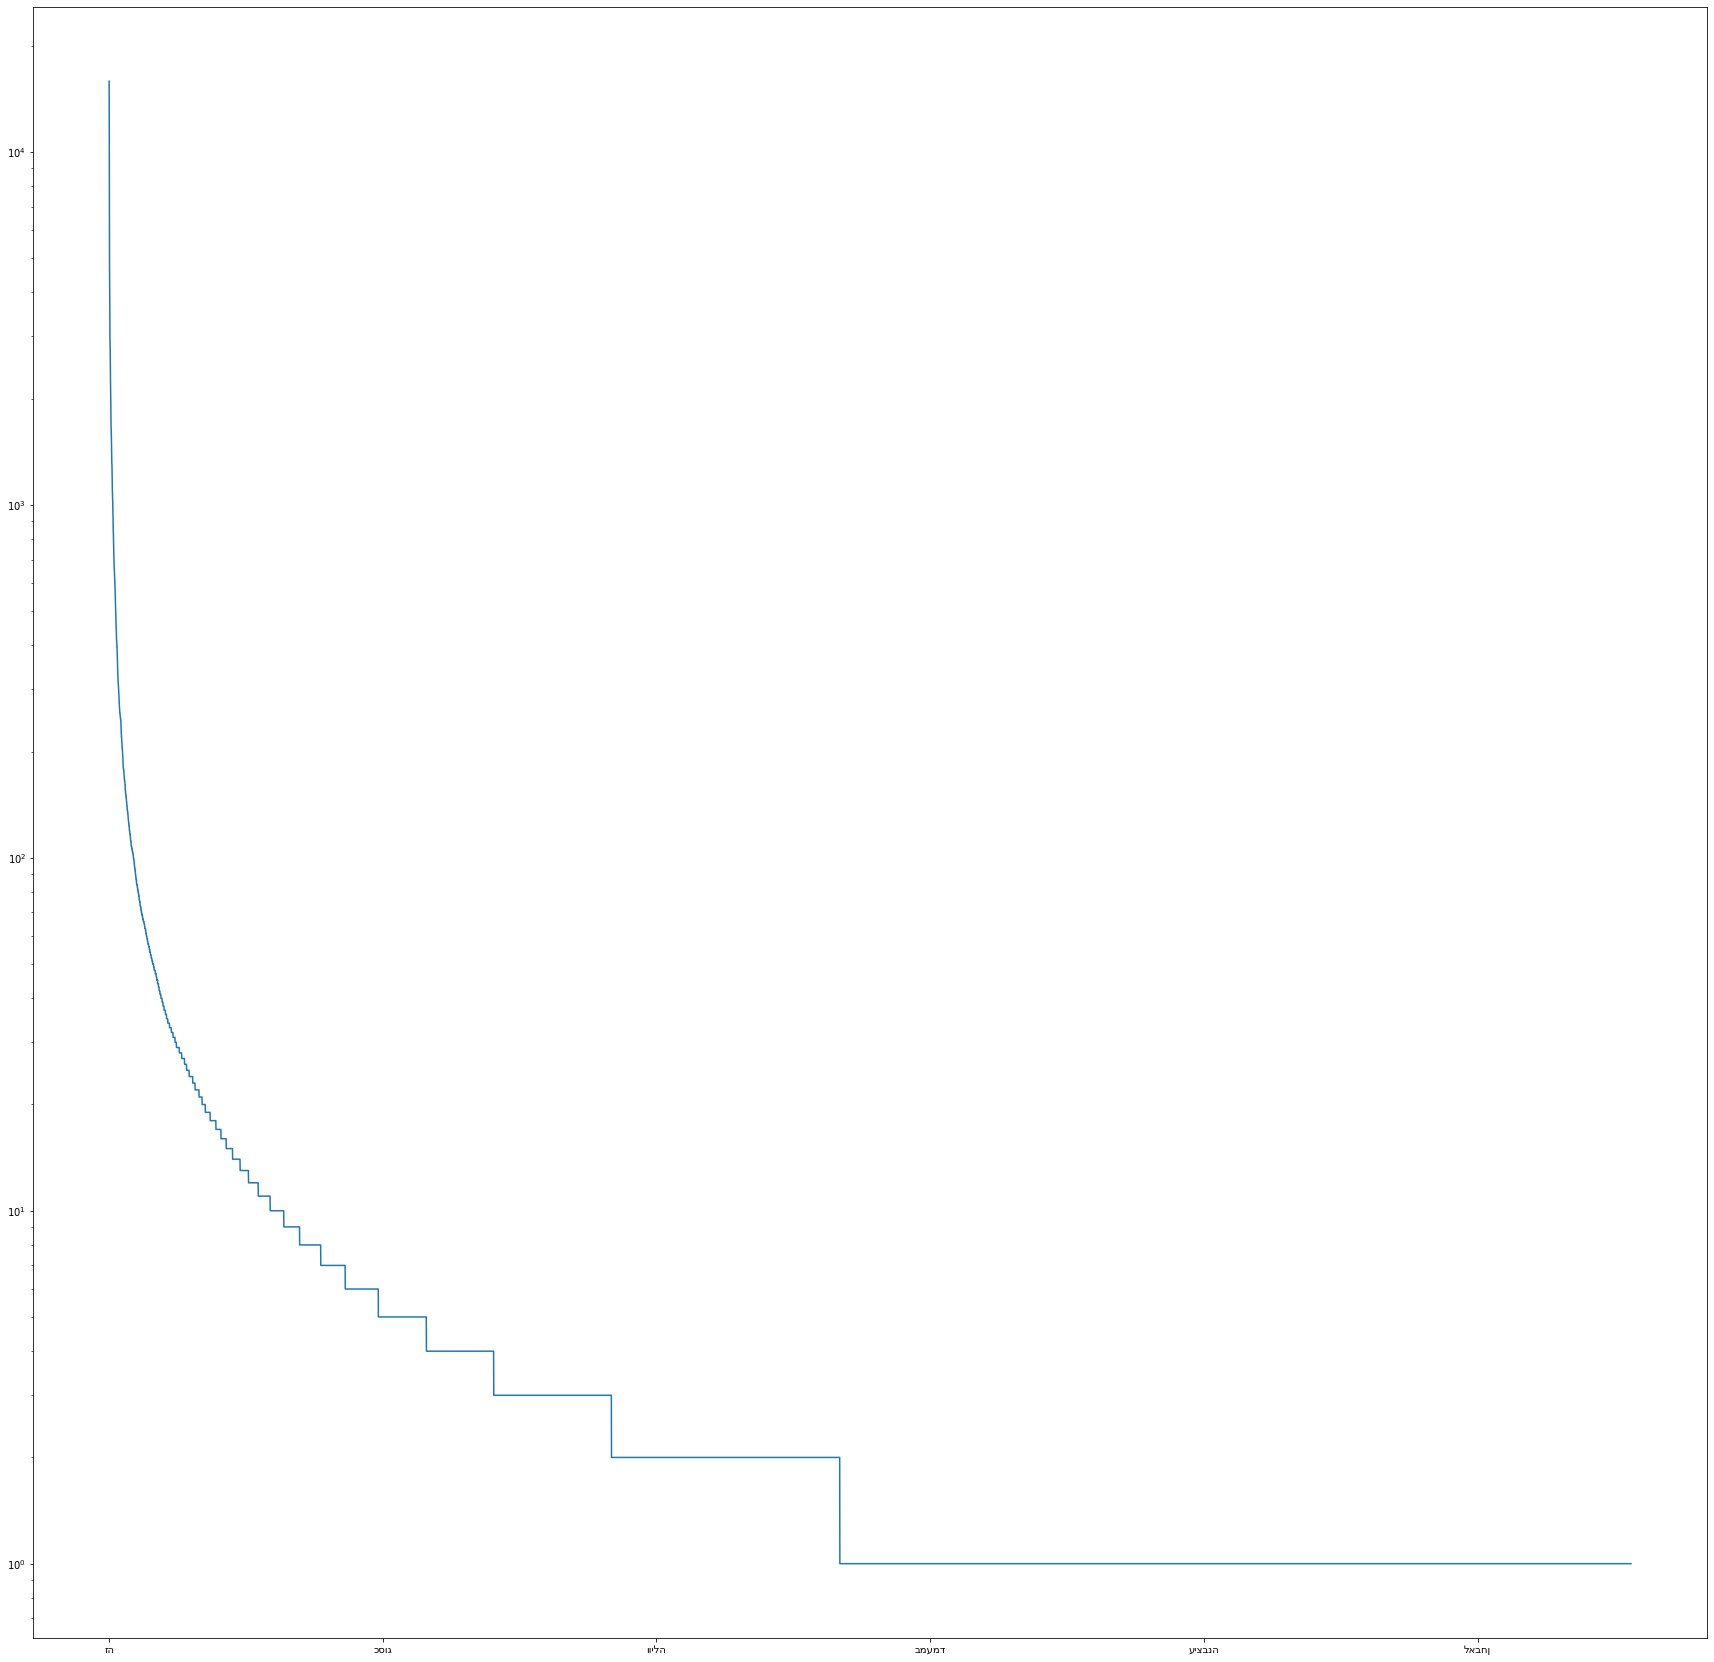

In [156]:
plt.figure(figsize = (30,30))
word_db['text'].value_counts().plot(logy=True)

In [140]:
heb_feature_names =[bidialg.get_display(feature) for feature in word_db['text'].value_counts().index.tolist()[:50]]


In [75]:
most_common_word = [item[0] for item in most_occur]
most_common_word

['זה',
 'לא',
 'אני',
 'את',
 'כאילו',
 'לי',
 'אה',
 'מה',
 'אז',
 'כן',
 'אבל',
 'גם',
 'של',
 'על',
 'אתה',
 'הוא',
 'שאני',
 'XXX',
 'יש',
 'כל',
 'משהו',
 'או',
 'היה',
 'עם',
 'אם',
 'כי',
 'לך',
 'מאוד',
 'שזה',
 'היא',
 'יותר',
 'כזה',
 'להיות',
 'ש',
 'שלי',
 'ו',
 'יכול',
 'הזה',
 'יודע',
 'אומרת',
 'רוצה',
 'שהוא',
 'וזה',
 'באמת',
 'ה',
 'אולי',
 'יודעת',
 'חושב',
 'הייתי',
 'הרבה',
 'איזה',
 'עכשיו',
 'זאת',
 'שאתה',
 'ככה',
 'טוב',
 'ואני',
 'קצת',
 'שם',
 'עוד',
 'כבר',
 'אומר',
 'לו',
 'אותי',
 'אין',
 'פעם',
 'ואז',
 'דברים',
 'ממש',
 'איך',
 'אחד',
 'לעשות',
 'צריך',
 'מרגיש',
 'אותו',
 'בסדר',
 'אמרתי',
 'כך',
 'שהיא',
 'אנשים',
 'חושבת',
 'נגיד',
 'כמו',
 'קשה',
 'עושה',
 'למה',
 'כמה',
 'שלך',
 'הם',
 'שאת',
 'פה',
 'שיש',
 'בעצם',
 'אנחנו',
 'הזמן',
 'שלא',
 'לה',
 'אמ',
 'נכון',
 'רק',
 'ולא',
 'היום',
 'אותך',
 'הייתה',
 'ב',
 'וגם',
 'להגיד',
 'דבר',
 'פשוט',
 'האלה',
 'הזאת',
 'נורא',
 'נראה',
 'רואה',
 'אדם',
 'לזה',
 'שני',
 'אחר',
 'בא',
 'בזה',
 'תמיד',
 '

In [77]:
from wordcloud import WordCloud
font_path="./external_src/OpenSans-VariableFont_wdth,wght.ttf"
word_cloud = WordCloud(
    font_path=font_path,
    collocations = False,
    background_color = 'white',
    max_words=200,
    stopwords=most_common_word,
    max_font_size=100)

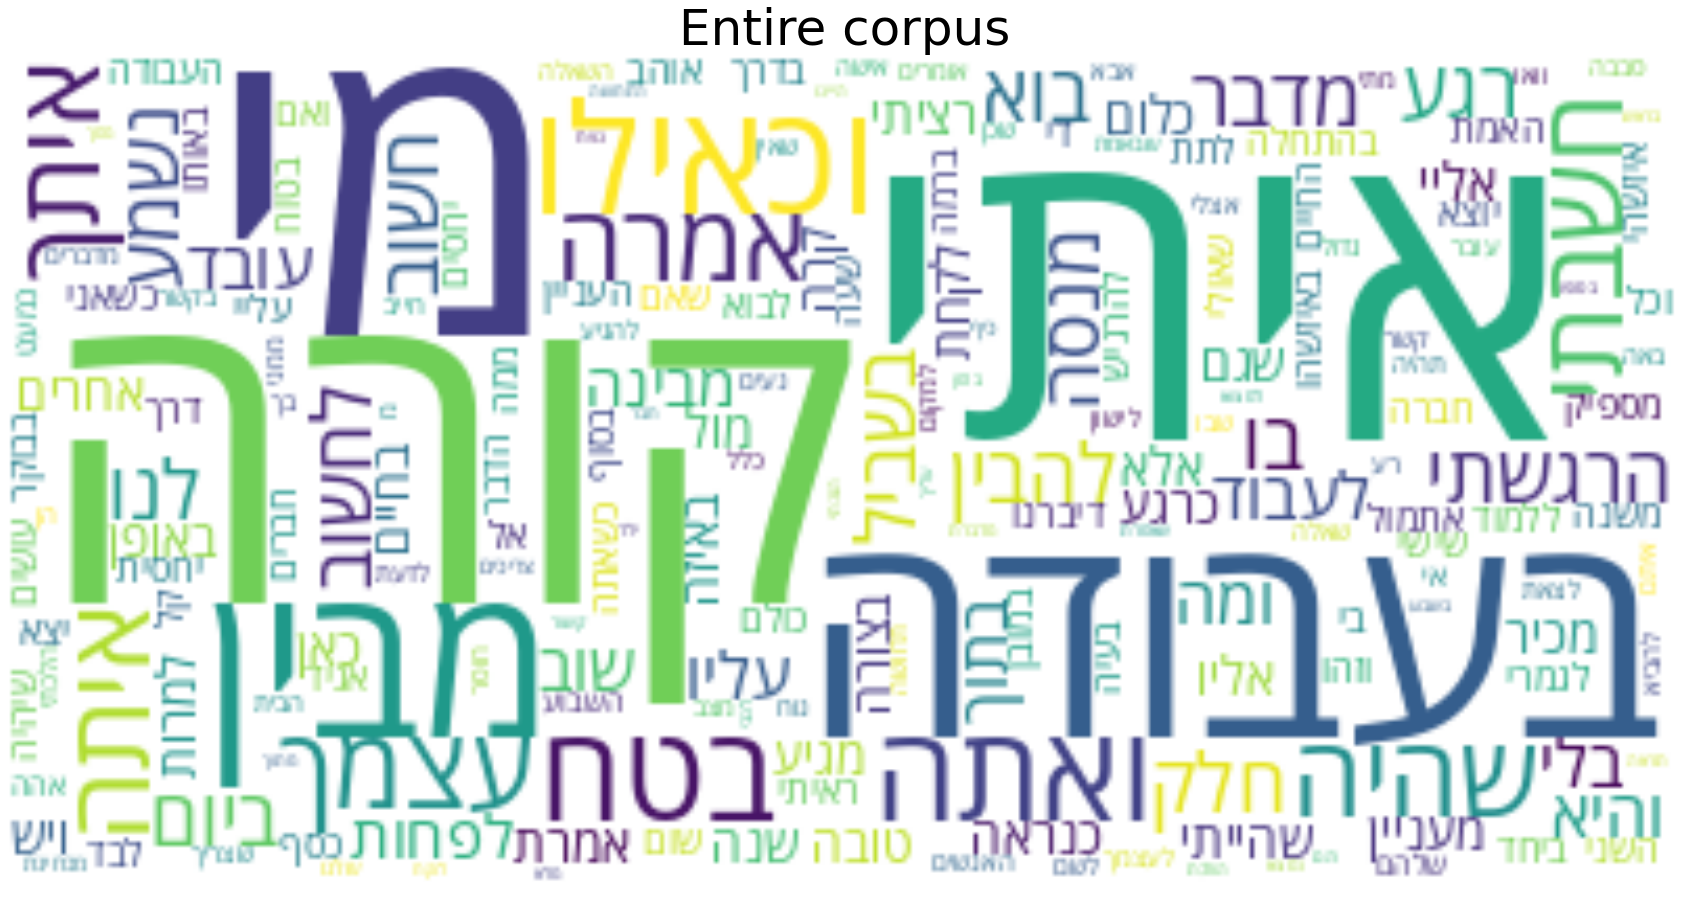

In [81]:
plt.figure(figsize = (30,30))
word_cloud.generate(' '.join(get_words_from_db(sent_word_db)))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Entire corpus",fontsize=50)
plt.show()

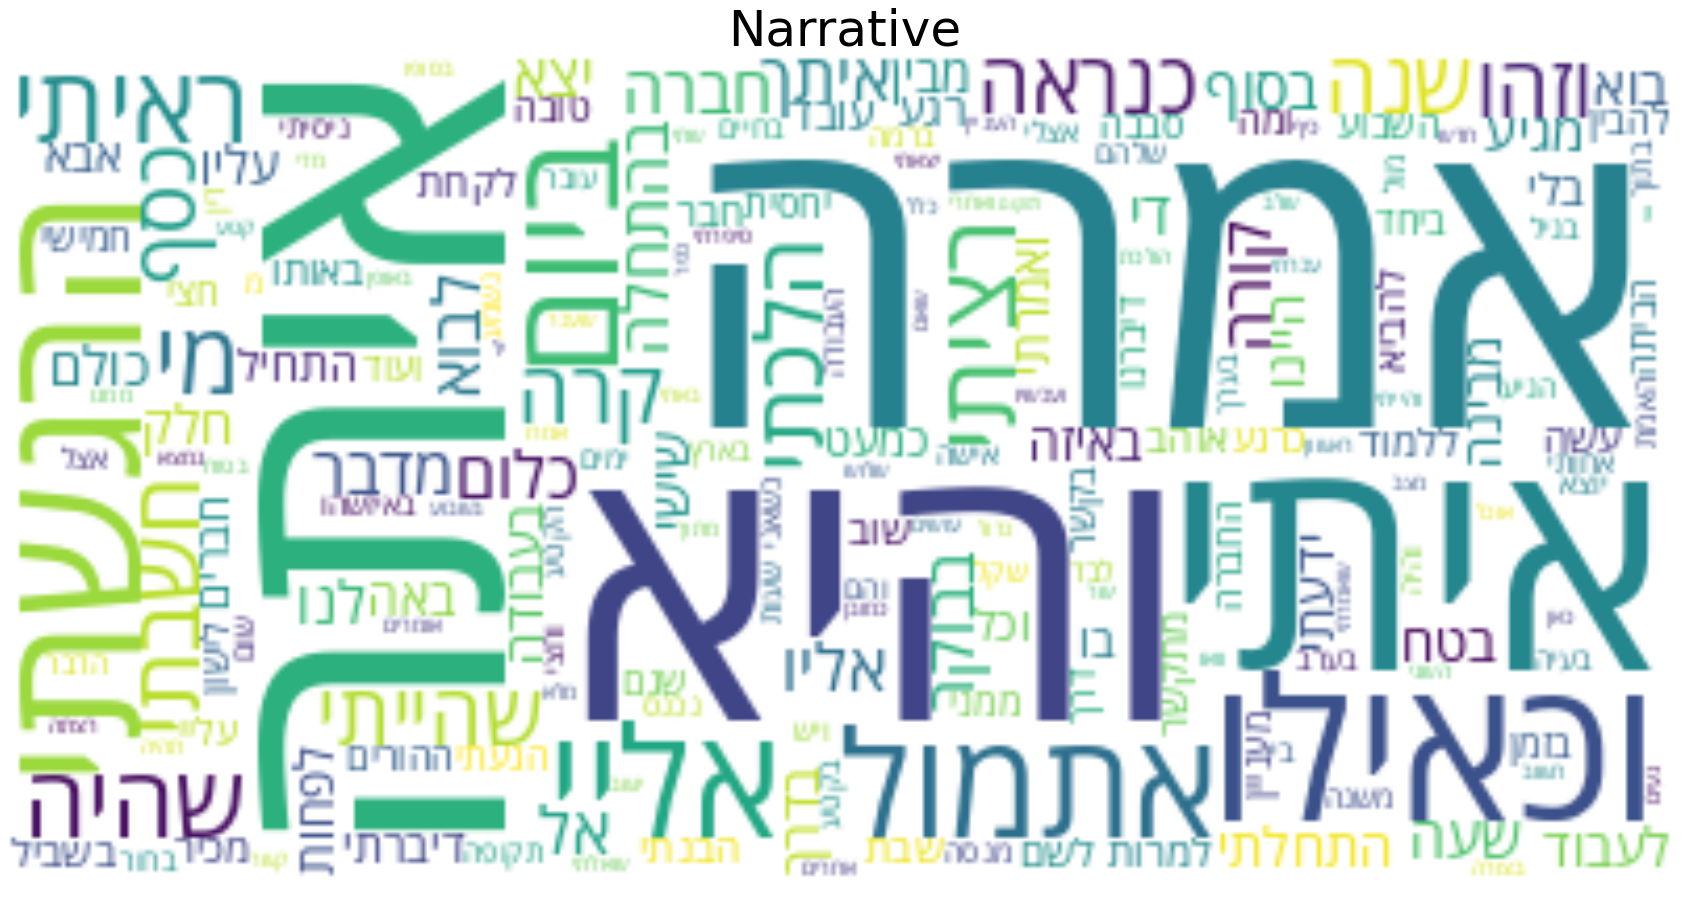

In [83]:
plt.figure(figsize = (30,30))
word_cloud.generate(' '.join(get_words_from_db(sent_word_db.query("is_nar == 1"))))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Narrative",fontsize=50)
plt.show()

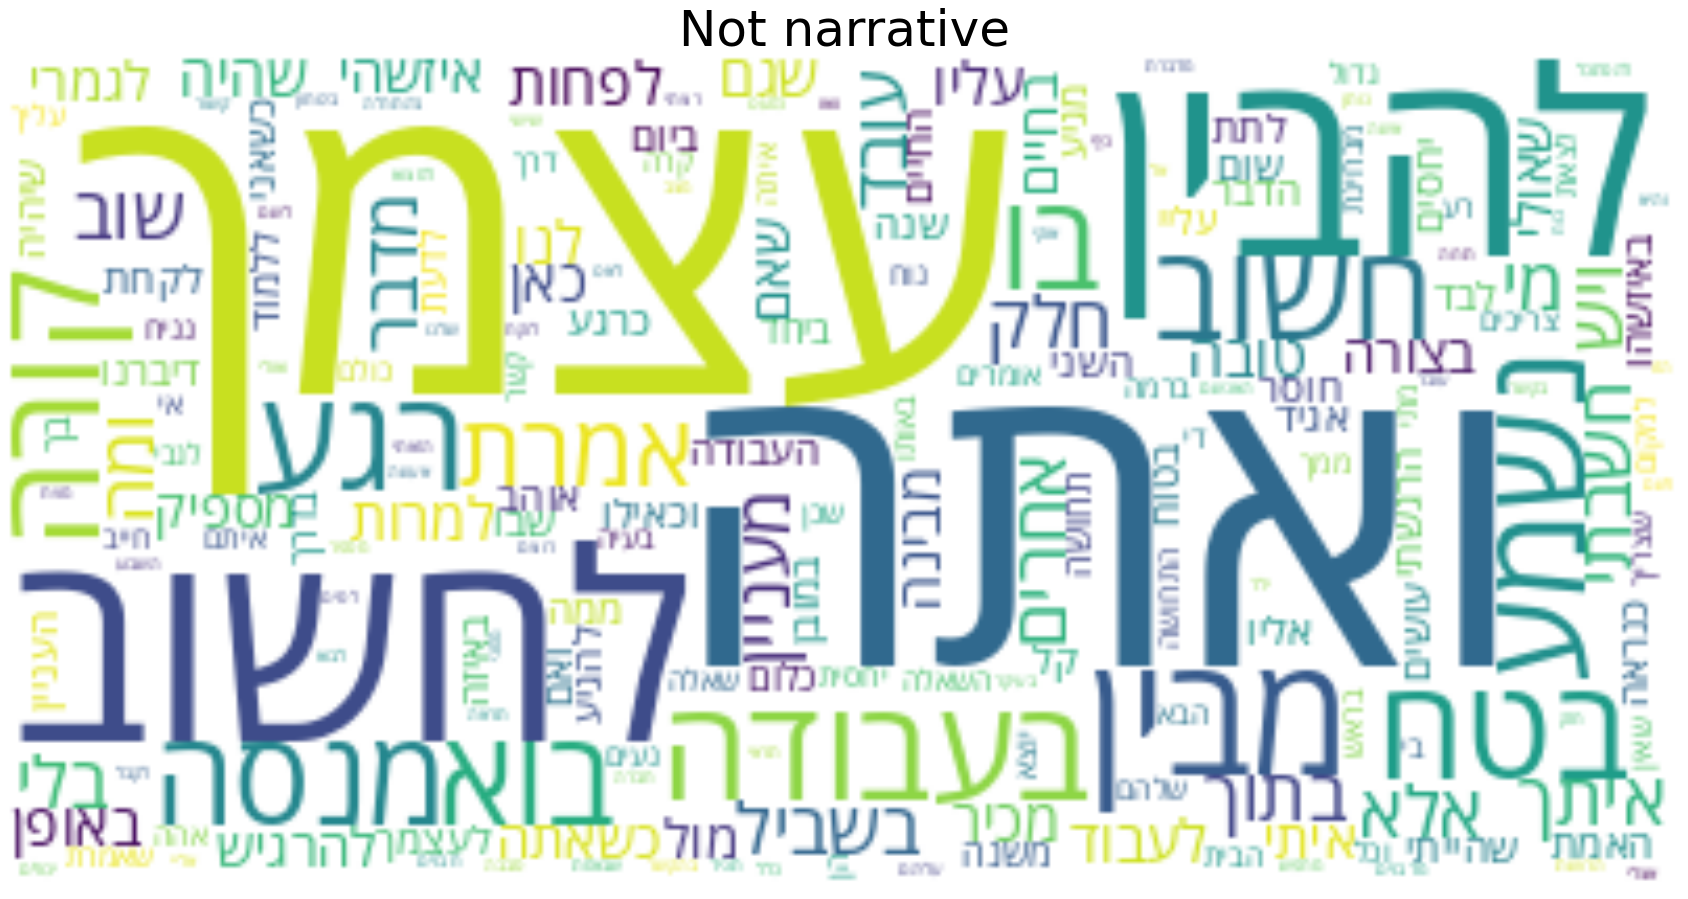

In [84]:
plt.figure(figsize = (30,30))
word_cloud.generate(' '.join(get_words_from_db(sent_word_db.query("is_nar == 0"))))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Not narrative",fontsize=50)
plt.show()

In [3]:
merged_db = common_utils.concat_dbs(dir_name,"merged_db")
merged_db.head()

doc_idx  merged_idx  is_question   is_nar  par_idx_in_doc  sent_len  \
0        1           0     0.000000 0.000000        0.000000 47.000000   
1        1           1     0.000000 0.000000        1.000000  2.000000   
2        1           2     1.000000 0.000000        2.000000 15.000000   
3        1           3     0.000000 0.000000        3.000000  8.000000   
4        1           4     0.000000 0.000000        4.000000 19.000000   

   is_client  sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  ...  f_per_3  \
0          0                0         1.000000         0.001724  ... 0.000000   
1          1                0         1.000000         0.003448  ... 0.000000   
2          0                0         1.000000         0.005172  ... 0.000000   
3          1                0         1.000000         0.006897  ... 0.000000   
4          0                0         1.000000         0.008621  ... 0.000000   

   f_per_A  f_tense_BEINONI  f_tense_FUTURE  f_tense_IMPERATIVE  f_tense_PAST  \
0 0.100000         0.000000        0.000000            0.000000      0.000000   
1 0.000000         0.000000        0.000000            0.000000      0.000000   
2 0.000000         0.000000        0.000000            0.000000      0.000000   
3 0.000000         0.000000        0.000000            0.000000      0.000000   
4 0.000000         0.000000        0.000000            0.000000      0.000000   

   POSTAG_NEG  POSTAG_TTL  POSTAG_yyCM  POSTAG_NNPT  
0         NaN         NaN          NaN          NaN  
1         NaN         NaN          NaN          NaN  
2         NaN         NaN          NaN          NaN  
3         NaN         NaN          NaN          NaN  
4         NaN         NaN          NaN          NaN  

[5 rows x 68 columns]

<Figure size 1080x576 with 0 Axes>

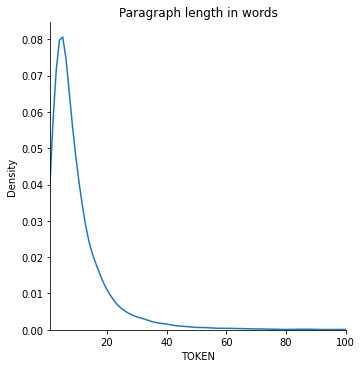

In [16]:
plt.figure(figsize = (15,8))
par_len_words = merged_db.groupby(['doc_idx','merged_idx','par_idx_in_doc'])
par_len_sns =  sns.displot(data=merged_db,
                            x='TOKEN',
                            kind='kde',
                            common_norm=False
                           )
par_len_sns.set(title="Paragraph length in words",xlim=((1,100)))

<Figure size 576x1080 with 0 Axes>

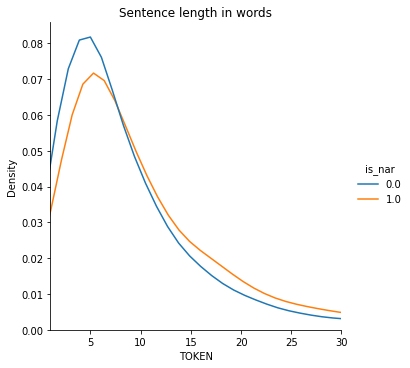

In [17]:
plt.figure(figsize = (8,15))
sent_len_words = merged_db.groupby(['doc_idx','merged_idx'])
sent_len_sns =  sns.displot(data=merged_db,
                            x='TOKEN',
                            kind='kde',
                            hue='is_nar',
                            common_norm=False
                           )
sent_len_sns.set(title="Sentence length in words",xlim=((1,30)))

In [18]:
imp.reload(feature_utils)
sent_db = common_utils.concat_dbs(dir_name,"sent_db",defines.SENT_FEATURES)
sent_db

doc_idx  sent_idx  is_question   is_nar  par_idx_in_doc  sent_len  \
0            1         0     0.000000 0.000000        0.000000 47.000000   
1            1         1     0.000000 0.000000        1.000000  2.000000   
2            1         2     1.000000 0.000000        2.000000 15.000000   
3            1         3     0.000000 0.000000        3.000000  8.000000   
4            1         4     0.000000 0.000000        4.000000 19.000000   
...        ...       ...          ...      ...             ...       ...   
36319       80       486     0.000000 0.000000      222.000000 21.000000   
36320       80       487     0.000000 0.000000      222.000000 27.000000   
36321       80       488     0.000000 0.000000      222.000000 23.000000   
36322       80       489     1.000000 0.000000      223.000000 19.000000   
36323       80       490     0.000000 0.000000      224.000000 15.000000   

       is_client  sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  
0              0                0         1.000000         0.001724  
1              1                0         1.000000         0.003448  
2              0                0         1.000000         0.005172  
3              1                0         1.000000         0.006897  
4              0                0         1.000000         0.008621  
...          ...              ...              ...              ...  
36319          1                3         0.666667         0.991853  
36320          1                4         0.833333         0.993890  
36321          1                5         1.000000         0.995927  
36322          0                0         1.000000         0.997963  
36323          1                0         1.000000         1.000000  

[36324 rows x 10 columns]

In [19]:
doc_stat_db = pd.DataFrame()

def get_doc_statistic(doc_idx):
    sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)),usecols=['is_nar','nar_idx','sent_len','is_client'])
    nar_num = sent_db['nar_idx'].nunique()
    avrg_sent_len_nar = sent_db.query('is_nar == 1')['sent_len'].mean()
    groupby(['doc_idx'])['nar_idx'].nunique()
    del sent_db

In [20]:
sent_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36324 entries, 0 to 36323
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doc_idx          36324 non-null  int64  
 1   sent_idx         36324 non-null  int64  
 2   is_question      36324 non-null  float64
 3   is_nar           36324 non-null  float64
 4   par_idx_in_doc   36324 non-null  float64
 5   sent_len         36324 non-null  float64
 6   is_client        36324 non-null  int64  
 7   sent_idx_in_par  36324 non-null  int64  
 8   sent_pos_in_par  36324 non-null  float64
 9   sent_pos_in_doc  36324 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 2.8 MB


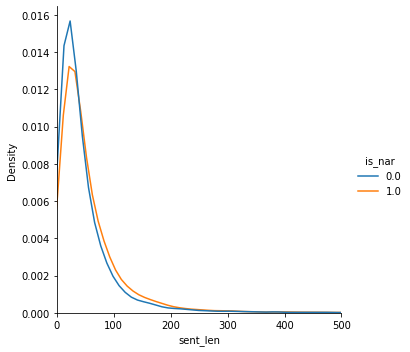

In [21]:
sent_len = sns.displot(data=sent_db,
                       x='sent_len',
                       hue='is_nar',
                       kind='kde',
                       common_norm=False,  # Normalize each distribution independently
                      )
sent_len.set(xlim=(0, 500))

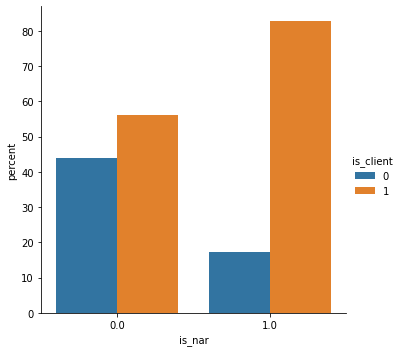

In [22]:
x,y = 'is_nar', 'is_client'

(sent_db
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

In [24]:
par_db = common_utils.concat_dbs(dir_name,"par_db",['par_len','par_type','is_nar'])
par_db

doc_idx  par_idx    par_len   par_type   is_nar
0            1        0  49.000000  therapist 0.000000
1            1        1   3.000000     client 0.000000
2            1        2  17.000000  therapist 0.000000
3            1        3  14.000000     client 0.000000
4            1        4  22.000000  therapist 0.000000
...        ...      ...        ...        ...      ...
15063       80      220 132.000000     client 0.000000
15064       80      221  97.000000  therapist 0.000000
15065       80      222 371.000000     client 0.000000
15066       80      223  20.000000  therapist 0.000000
15067       80      224  17.000000     client 0.000000

[15068 rows x 5 columns]

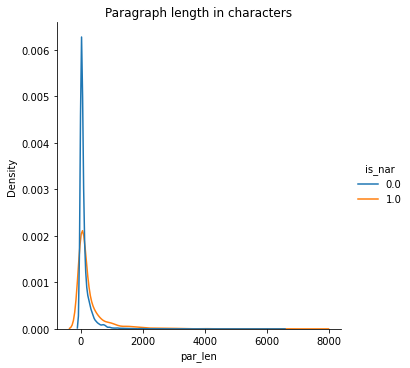

In [25]:
par_len_char = sns.displot(data=par_db,
                       x='par_len',
                       hue='is_nar',
                       kind='kde',
                       common_norm=False,  # Normalize each distribution independently
                      )
par_len_char.set(title='Paragraph length in characters')

### Chek distrib of par len in sentences

In [26]:
sent_db

doc_idx  sent_idx  is_question   is_nar  par_idx_in_doc  sent_len  \
0            1         0     0.000000 0.000000        0.000000 47.000000   
1            1         1     0.000000 0.000000        1.000000  2.000000   
2            1         2     1.000000 0.000000        2.000000 15.000000   
3            1         3     0.000000 0.000000        3.000000  8.000000   
4            1         4     0.000000 0.000000        4.000000 19.000000   
...        ...       ...          ...      ...             ...       ...   
36319       80       486     0.000000 0.000000      222.000000 21.000000   
36320       80       487     0.000000 0.000000      222.000000 27.000000   
36321       80       488     0.000000 0.000000      222.000000 23.000000   
36322       80       489     1.000000 0.000000      223.000000 19.000000   
36323       80       490     0.000000 0.000000      224.000000 15.000000   

       is_client  sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  
0              0                0         1.000000         0.001724  
1              1                0         1.000000         0.003448  
2              0                0         1.000000         0.005172  
3              1                0         1.000000         0.006897  
4              0                0         1.000000         0.008621  
...          ...              ...              ...              ...  
36319          1                3         0.666667         0.991853  
36320          1                4         0.833333         0.993890  
36321          1                5         1.000000         0.995927  
36322          0                0         1.000000         0.997963  
36323          1                0         1.000000         1.000000  

[36324 rows x 10 columns]

In [28]:
par_len_count = sent_db.groupby(['doc_idx','par_idx_in_doc'])['sent_idx'].count()
par_len_count

doc_idx  par_idx_in_doc
1        0.000000          1
         1.000000          1
         2.000000          1
         3.000000          1
         4.000000          1
                          ..
80       220.000000        3
         221.000000        2
         222.000000        6
         223.000000        1
         224.000000        1
Name: sent_idx, Length: 14918, dtype: int64

In [29]:
par_len_count.describe()

count   14918.000000
mean        2.434911
std         3.717304
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       111.000000
Name: sent_idx, dtype: float64

In [30]:
# find par with max length
par_len_count.idxmax(),par_len_count.max()

((5, 19.0), 111)

In [31]:
par_len_count.reset_index(drop=True).median()

1.0

In [32]:
par_len_count.quantile(q=0.95)

8.0

In [33]:
par_len_count.quantile(q=0.5)

1.0

In [34]:
par_len_count.quantile(q=0.75)

2.0

<Figure size 1080x576 with 0 Axes>

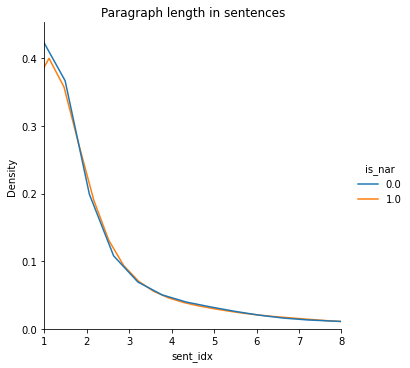

In [35]:
plt.figure(figsize = (15,8))
par_len_sent =  sns.displot(data=sent_db,x=par_len_count.reset_index(drop=True),
                            kind='kde',
                            hue='is_nar',
                            common_norm=False
                           )
par_len_sent.set(title="Paragraph length in sentences",xlim=((1,8)))

[Text(0.5, 1.0, 'Paragraph length in sentences')]

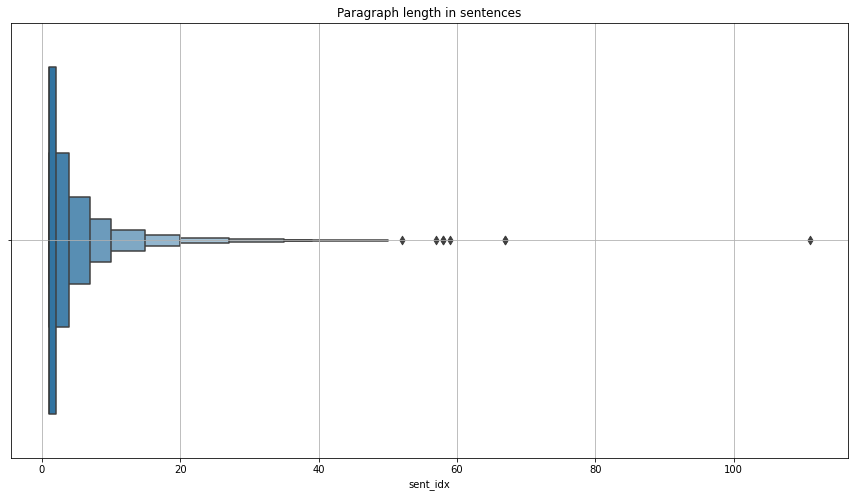

In [36]:
plt.figure(figsize = (15,8))
par_len_sent_b = sns.boxenplot(data=sent_db,
                               x=par_len_count.reset_index(drop=True),
                               hue='is_nar')
par_len_sent_b.grid()
par_len_sent_b.set(title="Paragraph length in sentences")

## Build word cloud